#**Importing dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Data collection and pre-processing

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#finding correaltion nof the data
correlation = gold_data.corr()

<ipython-input-8-218d2f487847>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

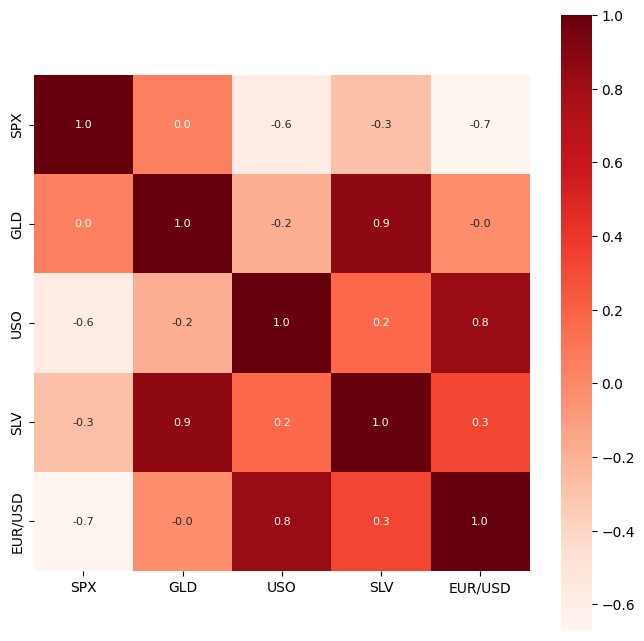

In [ ]:
#constuctiong heatmap to understand the relation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Reds')

In [ ]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-11-d70e0234eae3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color= 'blue')


<Axes: xlabel='GLD', ylabel='Density'>

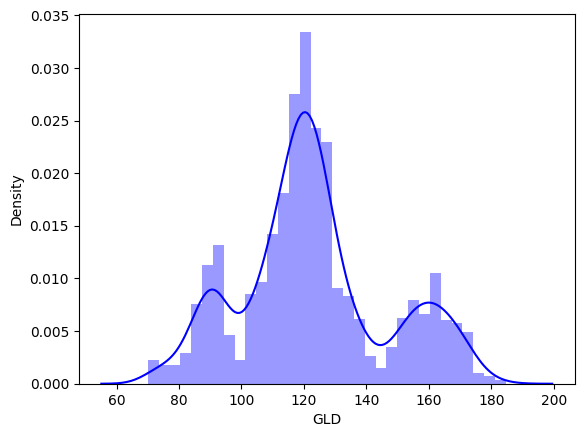

In [ ]:
#checking the distribution of gold price
sns.distplot(gold_data['GLD'], color= 'blue')

Splitting the features and target

In [ ]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [ ]:
print(X, Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#Splitting into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#Model training Random forest Ensemble

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

#Model Evaluation

In [ ]:
#prediction on the test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.6066988   82.0633997  116.10480014 127.67400054 120.81460132
 154.56289828 150.26949826 126.20130035 117.31539876 126.1070005
 116.59190072 171.83660078 141.40319804 167.98289944 115.17019984
 117.65440056 138.04580353 170.30880088 160.33750315 158.43649982
 155.24800061 125.26500015 176.13170024 157.87040313 125.16650076
  93.89389965  77.3547002  120.74250031 119.08249923 167.52869965
  88.07380067 125.27470019  91.15320072 117.85549992 121.05959948
 137.04610068 115.61140118 115.2674009  147.52590026 107.03230089
 104.17670246  87.21739767 126.41680073 118.1077003  153.76549865
 119.46920028 108.36600013 107.97769818  93.18500021 127.20099773
  75.35940013 113.61169968 121.37089995 111.13559894 118.86149874
 120.31499978 157.10850027 167.02780164 147.30669706  86.09709901
  94.31210042  86.86399871  90.55620064 118.97580079 126.4988008
 127.53900025 170.39010014 122.48519906 117.24129925  98.62030066
 168.2754013  142.8569982  132.33880238 121.1157019  121.04969969
 119.7852008

In [ ]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:", error_score) #the performance is good

R squared error: 0.9896260044501106


Compare the actual values and predicted values in a plot

In [ ]:
Y_test = list(Y_test)

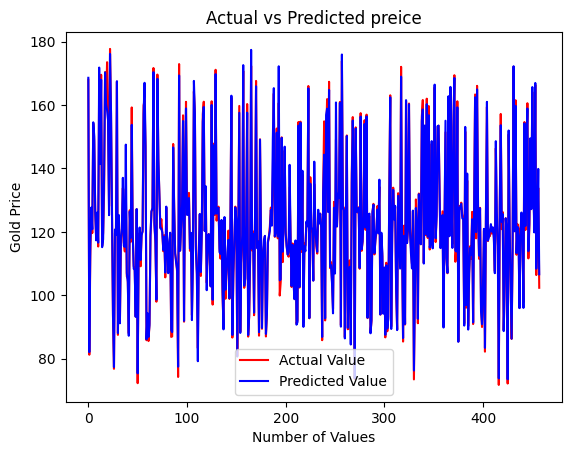

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label = 'Predicted Value')
plt.title('Actual vs Predicted preice')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()